<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#-Introduction-" data-toc-modified-id="-Introduction--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Introduction </a></span></li>
    <li><span><a href="#-Derivation-of-2D-heat-equation-" data-toc-modified-id="-Derivation-of-2D-heat-equation--2"><span class="toc-item-num">2&nbsp;&nbsp;</span> Derivation of 2D heat equation </a></span></li>
    <li><span><a href="#-Formulation-of-the-problem-" data-toc-modified-id="-Formulation-of-the-problem--3"><span class="toc-item-num">3&nbsp;&nbsp;</span> Formulation of the problem </a></span></li>
     <li><span><a href="#-Analytical-solution-" data-toc-modified-id="-Analytical-solution--4"><span class="toc-item-num">4&nbsp;&nbsp;</span> Analytical solution </a></span></li>
    <li><span><a href="#-Heat-equation-derived-by-FEM-" data-toc-modified-id="-Heat-equation-derived-by-FEM--5"><span class="toc-item-num">5&nbsp;&nbsp;</span> Heat equation derived by FEM </a></span></li>
    <li><span><a href="#-Analytical-and-numerical-solution-for-a-specified-problem-" data-toc-modified-id="-Analytical-and-numerical-solution-for-a-specified-problem--6"><span class="toc-item-num">6&nbsp;&nbsp;</span> Analytical and numerical solution for a specified problem </a></span></li>
         <ul class="toc-item"><li><span><a href="#-Analytical-approach-" data-toc-modified-id="-Analytical-approach--6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span> Analytical approach </a></span></li></ul>
    <ul class="toc-item"><li><span><a href="#-Numerical-approach-" data-toc-modified-id="-Numerical-approach--6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span> Numerical approach </a></span></li></ul>
    <ul class="toc-item"><li><span><a href="#-Comparison-of-both-methods-" data-toc-modified-id="-Comparison-of-both-methods--6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span> Comparison of both methods </a></span></li></ul>  
    <li><span><a href="#-Convergence-of-numerical-solution-" data-toc-modified-id="-Convergence-of-numerical-solution--7"><span class="toc-item-num">7&nbsp;&nbsp;</span> Convergence of numerical solution </a></span></li>
    <li><span><a href="#-Description-of-our-application-" data-toc-modified-id="-Description-of-our-application--8"><span class="toc-item-num">8&nbsp;&nbsp;</span> Description of our application </a></span></li>
    <li><span><a href="#-Conclusions-" data-toc-modified-id="-Conclusions--9"><span class="toc-item-num">9&nbsp;&nbsp;</span> Conclusions </a></span></li>
    <li><span><a href="#-Literature-" data-toc-modified-id="-Literature--10"><span class="toc-item-num">10&nbsp;&nbsp;</span> Literature </a></span></li>
</ul></div>

# Heat equation with finite element method in two dimensions.
## Authors: Tymoteusz Cieślik, Bartosz Goworowski, Jakub Feluś 
### Date: 04.06.2021

<h2> Introduction </h2>

The main idea behind our project was to create the application in which user can choose parameters and observe the heat spreading in two dimensional plate. First let's start with a quick description of our method and equation. Heat equation is the parabolic equation which describes how heat is being transferred within some objects or just simply in the area. Finite element method is a widely used method for numerically solving differential equations or like in our case partial differential equations. This method can be used in many different problems such as heat transfer, fluid flow, mass transport or electromagnetic potential. The main idea behind this method is to divide the large system into smaller parts which are called finite elements. This is achieved by a particular space discretization in the space dimensions, which is implemented by the construction of a mesh of the object. Then shortly the equations are numerically approximated in simpler parts of mesh. After short introduction we are ready to move on to the theoretical aspects of our project.

<h2> Derivation of 2D heat equation </h2>
Recall the statement for the conservation of energy:

\begin{equation}
\label{eq: 1}\tag{1}
    \rho c \frac{\partial T}{\partial t} = -\nabla \cdot \textbf{q} + s,
\end{equation}

where $\textbf{q}$ can be expressed as:

\begin{equation}
\label{eq: 2}\tag{2}
    \textbf{q} = \left[\begin{array}{l} q_x\\ q_y \end{array}\right] = - 
    \textbf{K}
    \nabla^{T} T.
\end{equation}

Joining \eqref{eq: 1} with \eqref{eq: 2} yields:

\begin{equation}
\label{eq: 3}\tag{3}
    \rho c \frac{\partial T}{\partial t} = \nabla \cdot (\textbf{K}
    \nabla^{T} T) + s.
\end{equation}

Equation \eqref{eq: 3} describes heat diffusion in two dimensions. It consists of:
- $\rho$ -- object density,
- $c$ -- heat capacity of the object,
- $T$ -- temperature of the object,
- $s$ -- heat source,
- $\textbf{K} = 
\begin{bmatrix}
    k_x & 0\\
    0 & k_y
\end{bmatrix}$ -- matrix containing thermal conductivity in $x$ and $y$ direction.

Equation \eqref{eq: 3} can be rewritten in the following way:

\begin{equation} 
\label{eq: 4}\tag{4}
        \frac{\partial T}{\partial t} = \frac{1}{\rho c} \left[k_x,k_y\right]\left[\begin{array}{l}\frac{\partial^2 T}{\partial x^2}\\ \frac{\partial^2 T}{\partial y^2}\end{array}\right] + \frac{s}{\rho c}.
\end{equation}

Our goal is to derive the solution for $T(x,y,t)$ from equation \eqref{eq: 4}.


<h2> Formulation of the problem </h2>
Let's begin with the introduction to the problem. Let $u(x,y,t)$ be the temperature of a uniform, rectangular plate with negligible thickness, at the position $(x,y)$ and time $t$. The edges of the plate are kept at $0^{\circ}C$. The way the plate is heated initially is given by the initial condition. This problem can be written mathematically in the following way:

\begin{equation}
\label{eq: 5}\tag{5}
    \left\{
        \begin{array}{l}
            u_{t} = c^{2}(u_{xx}+u_{yy}), \quad x,y \in (0,a)\times(0,b),\,t \geq 0,\\
u(x,y,0) = \phi(x,y), \quad x,y \in [0,a]\times[0,b],   \\
u(0,y,t) = u(a,y,t) = 0,\\
u(x,0,t) = u(x,b,t) = 0.
        \end{array}
    \right.
\end{equation}

<h2> Analytical solution </h2>
First we assume that $u$ can be expressed in the following way:

\begin{equation}
\label{eq: 6}\tag{6}
    u(x,y,t) = X(x)Y(y)T(t).
\end{equation}

Now we calculate derivatives of \eqref{eq: 6}:

\begin{align}
    u_t &= XYT',\\
\label{eq: 7}\tag{7}
    u_{xx} &= X''YT,\\
    u_{yy} &= XY''T.
\end{align}

Plugginng them into the heat equation yields

\begin{equation}
    XYT' = c^2(X''YT + XY''T).
\end{equation}

Dividing both sides by $XYT$ gives:

\begin{equation}
\label{eq: 8}\tag{8}
    \frac{T'}{T} = c^2\left(\frac{X''}{X} + \frac{Y''}{Y}\right) = -\lambda.
\end{equation}
We can split \eqref{eq: 8} into 2 separate equations:

\begin{equation}
\label{eq: 9}\tag{9}
        \frac{T'}{T} = -\lambda
\end{equation}

\begin{equation}
\label{eq: 10}\tag{10}
        c^2\left(\frac{X''}{X} + \frac{Y''}{Y}\right) = -\lambda.
\end{equation}

Let's solve \eqref{eq: 9} first. This is a simple ordinary differential equation:

\begin{equation}
\label{eq: 11}\tag{11}
        T' + \lambda T = 0,
\end{equation}

and the solution for it is:

\begin{equation}
\label{eq: 12}\tag{12}
        T(t) = A\exp(-\lambda t), \quad A = \text{const.}
\end{equation}

Now let's look at \eqref{eq: 10}. We can rewrite it in the form:

\begin{equation}
\label{eq: 13}\tag{13}
        \frac{X''}{X} =  -\frac{\lambda}{c^2} - \frac{Y''}{Y} = -\mu.
\end{equation}

Just like in \eqref{eq: 8} we can split \eqref{eq: 13} into 2 separate equations:

\begin{equation}
\label{eq: 14}\tag{14}
        \frac{X''}{X} = -\mu,
\end{equation}

\begin{equation}
\label{eq: 15}\tag{15}
        -\frac{\lambda}{c^2} - \frac{Y''}{Y} = -\mu.
\end{equation}

Therefore

\begin{equation}
\label{eq: 16}\tag{16}
        X'' + \mu X = 0
\end{equation}

\begin{equation}
\label{eq: 17}\tag{17}       
        Y'' + \nu Y = 0, \quad \nu = \left(\mu - \frac{\lambda}{c^2}\right).
\end{equation}

Now, from the boundary conditions we have

\begin{align}
    u(0,y,t) &= X(0)Y(y)T(t) = 0 \rightarrow X(0) = 0,\\
    u(a,y,t) &= X(a)Y(y)T(t) = 0 \rightarrow X(a) = 0,\\
    u(x,0,t) &= X(x)Y(0)T(t) = 0 \rightarrow Y(0) = 0,\\
    u(x,b,t) &= X(x)Y(b)T(t) = 0 \rightarrow Y(b) = 0.
\end{align}

Thus we have 2 two-point boundary value problems:

$$
\left\{
\label{eq: 18}\tag{18}
\begin{array}{l}
    X'' + \mu X = 0,\\
    X(0) = X(a) = 0.
\end{array}
\right.
$$

$$
\left\{
\label{eq: 19}\tag{19}
\begin{array}{l}
    Y'' + \nu Y = 0,\\
    Y(0) = Y(b) = 0.
\end{array}
\right.
$$

We will focus on solving \eqref{eq: 18} first. In order to get a non-trivial solution we take $\mu > 0$, therefore the general solution for $X$ is

\begin{equation}
\label{eq: 20}\tag{20}
        X(x) = B\cos(\sqrt{\mu}x) + C\sin(\sqrt{\mu}x), \quad B,C = \text{const.}.
\end{equation}

After plugginng boundary conditions we obtain the final solution for $X_n$

\begin{equation}
\label{eq: 21}\tag{21}
        X_n(x) = C\sin(\sqrt{\mu_n}x), \quad \mu_n = \left(\frac{n\pi}{a}\right)^2, n \in \mathrm{N}.
\end{equation}

Now, let's solve \eqref{eq: 19}. Again, to obtain a non-trivial solution we take $\nu$ such that $\nu > 0.$ This leads to the general solution for $Y$:

\begin{equation}
\label{eq: 22}\tag{22}
        Y(y) = D\cos\left(\sqrt{\nu} y\right) + E\sin\left(\sqrt{\nu} y\right), \quad D,E = \text{const.}
\end{equation}

After plugging boundary conditions we get the final solution for $Y_m$:

\begin{equation}
\label{eq: 23}\tag{23}
        Y_m(y) = E\sin(\sqrt{\nu_m}y), \quad \nu_m = \left(\frac{m\pi}{b}\right)^2, m \in \mathrm{N}.
\end{equation}

After plugging $\mu_n$ from \eqref{eq: 21} and $\nu_m$ from \eqref{eq: 23} into \eqref{eq: 17} we obtain the formula for $\lambda_{nm}$:

\begin{equation}
\label{eq: 24}\tag{24}
        \lambda_{nm} = c^2(\mu_n + \nu_m).
\end{equation}

Assembling these results, we get a solution for any pair $n,m \geq 1$:

\begin{equation}
\label{eq: 25}\tag{25}
u_{mn}(x,y,t) = X_n(x)Y_m(y)T_{nm}(t) = F_{nm}
\sin(\sqrt{\mu_n}x)
\sin(\sqrt{\nu_m}y) 
\exp(-\lambda_{nm} t),
\end{equation}
where

$$
    F_{nm} = A_{nm} C_n E_m.
$$

Using the principle of superposition we have the general solution for the stated problem with boundary conditions:

\begin{equation}
\label{eq: 26}\tag{26}
u(x,y,t) = \sum_{n=1}^\infty \sum_{m=1}^\infty F_{nm}
\sin(\sqrt{\mu_n}x)
\sin(\sqrt{\nu_m}y) 
\exp(-\lambda_{nm} t).
\end{equation}

Now, we must determine the values of the coefficients $F_{nm}$, so that our solution also satisfies the initial condition. Therefore

\begin{equation}
\label{eq: 27}\tag{27}
    \phi(x,y) = u(x,y,0) = \sum_{n=1}^\infty \sum_{m=1}^\infty F_{nm}
\sin(\sqrt{\mu_n}x)
\sin(\sqrt{\nu_m}y),
\end{equation}

which is the double sine Fourier series for $\phi(x,y)$. Thus

\begin{equation}
\label{eq: 28}\tag{28}
    F_{nm} = \frac{4}{ab}\int_0^a \int_0^b 
    \phi(x,y)
    \sin(\sqrt{\mu_n}x)
    \sin(\sqrt{\nu_m}y)
    dydx.
\end{equation}


<h2> Heat equation derived by FEM </h2>

The first step of the method is to choose the type of element. Thanks to the multiple articules, we decided the choose the simplest two-dimensional elements which are $4$-node quadrilateral. Shortly the method will use the $4$ shape functions (because of $4$ nodes), which will define the behaviour of the temperature in those nodes that will convert to the temperature in whole element. We will refer to those functions as:

\begin{equation}
\label{eq: 29}\tag{29}
    N = \left[\,N_1,\,N_2,\,N_3,\,N_4\,\right].
\end{equation}

Those functions will be expressed in the global coordinate system (so functions of $x$ and $y$). The temeperature will be approximated as follows.

\begin{equation}
\label{eq: 30}\tag{30}
    T\cong \left[\,N_1,\,N_2,\,N_3,\,N_4\,\right]\left[\begin{array}{l} T_1\\ T_2\\ T_3\\ T_4 \end{array}\right].
\end{equation}

Type of used elements:
<img src="mesh_nodes.png" width=400 height=400 />

When we substitute those formulas into the \eqref{eq: 4}, we get the following equation.

\begin{equation}
\label{eq: 31}\tag{31}
    \rho c \frac{\partial}{\partial t}\textbf{NT} = \nabla(\textbf{K}
    \nabla^{T}\textbf{N})\textbf{T} + s.
\end{equation}

Using Galerkin method we multiply both sides by the shape functions and integrate over the elements and we obtain the weak formulation of our problem:

\begin{equation}
\label{eq: 32}\tag{32}
    \rho c \int\!\int\textbf{N}^T\frac{\partial}{\partial t}\textbf{NT}\textrm{dxdy} = \int\!\int\textbf{N}^T\nabla(\textbf{K}
    \nabla^{T}\textbf{N})\textbf{T}\textrm{dxdy} + \int\!\int\textbf{N}^Ts \,\textrm{dxdy}.
\end{equation}

After applying the integration by parts on the middle part of that equation and using divergence theorem we have:

\begin{equation}
\label{eq: 33}\tag{33}
    \rho c \int\!\int\textbf{N}^T\textbf{N}\,\textrm{dxdy}\frac{\partial}{\partial t}\textbf{T} + \int\!\int\nabla(\textbf{N})^T(\textbf{K}
    \nabla^{T}\textbf{N})\,\textrm{dxdy}\textbf{T} = \int\!\int\textbf{N}^Ts \,\textrm{dxdy} + \int\textbf{N}^T \bar{q} \overrightarrow{\textbf{n}} \textrm{dS},
\end{equation}

where
- $\textrm{dS}$ -- integration over whole surface,
- $\bar{q}$ -- heat flux through the surface, positive value is understood as the inflow of the heat to the surface and negative value as outflow,
- $\overrightarrow{\textbf{n}}$ -- normal vector to the surface.

There are $4$ possibilities of boundary flux because of $4$ edges of our plate.

The previous equation can be written as

\begin{equation}
\label{eq: 34}\tag{34}
    \textbf{MM}\frac{\partial}{\partial t}\textbf{T} + \textbf{KMT} = \textbf{F},
\end{equation}

where

\begin{array}{l}
    \textbf{MM} = \rho c \int\!\int\textbf{N}^T\textbf{N}\,\textrm{dxdy}, \\
    \textbf{KM} = \int\!\int(\nabla\textbf{N})^T(\textbf{K}
    \nabla^{T}\textbf{N})\,\textrm{dxdy},\\
\label{eq: 35}\tag{35}
    \textbf{F} = \int\!\int\textbf{N}^Ts \,\textrm{dxdy} + \int\textbf{N}^T \bar{q} \overrightarrow{\textbf{n}} \textrm{dS}. 
\end{array}

The shape function derivatives are definied as follows:

\begin{equation}
\label{eq: 36}\tag{36}
    \nabla\textbf{N} = \left[\begin{array}{2} \frac{\partial N_1}{\partial x} & \frac{\partial N_2}{\partial x} & \frac{\partial N_3}{\partial x} & \frac{\partial N_4}{\partial x} \\  \frac{\partial N_1}{\partial y} & \frac{\partial N_2}{\partial y} & \frac{\partial N_3}{\partial y} & \frac{\partial N_4}{\partial y} \end{array}\right].
\end{equation}

Our next step is to discretize the time using finite differences, whcih leads to.

\begin{equation}
\label{eq: 37}\tag{37}
    \textbf{MM}\frac{\textbf{T}^{n+1}-\textbf{T}^{n}}{\Delta t} + \textbf{KMT}^{n+1} = F.
\end{equation}

Of course $\textbf{T}^{n+1}$ is the unknown new temperature while $\textbf{T}^{n}$ is the old vector of temperatures. The equation \eqref{eq: 37} can be written in this way

\begin{equation}
\label{eq: 38}\tag{38}
    \left(\frac{\textbf{MM}}{\Delta t} + \textbf{KM}\right)\textbf{T}^{n+1} = \frac{\textbf{MM}}{\Delta t}\textbf{T}^{n} + \textbf{F}.
\end{equation}

The area over which the integration has to be carried out must be expressed in terms of local coordinates. For the integration of element matrices we will use Gauss-Legendre quadrature which looks as follows

\begin{equation}
\label{eq: 39}\tag{39}
    \int_{-1}^{1}\!\int_{-1}^{1}f(\xi, \eta)\,\textrm{d}\xi\textrm{d}\eta \approx \sum_{i=1}^{nx}\sum_{j=1}^{ny}f(\xi_i, \eta_j)w_iw_j = \sum_{n=1}^{nip}f(\xi_n, \eta_n)\textbf{W}_n,
\end{equation}

where $nx$ and $ny$ are the number of integration poins in each direction, $\xi_i$ and $\eta_j$ are the local spatial coordinates of those points and $w_i, \, w_j, \,W_n$ are the weights. For the simplicity in our project and application we decided to set the same importance of all nodes and take $1$ for all weights. Of course $nip = nx \times ny$.

Derivatives are converted from one coordinate system to another by means of the chain rule, expressed in matrix form as

\begin{equation}
\label{eq: 40}\tag{40}
  \left[\begin{array}{1} \frac{\partial}{\partial \xi} \\ \frac{\partial}{\partial \eta} \end{array}\right] = \textbf{J}\left[\begin{array}{1} \frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \end{array}\right],
\end{equation}

where $\textbf{J}$ is the jacobian matrix. Previous equation can be written in following way.

\begin{equation}
\label{eq: 41}\tag{41}
  \left[\begin{array}{1} \frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \end{array}\right] = \textbf{J}^{-1}\left[\begin{array}{1} \frac{\partial}{\partial \xi} \\ \frac{\partial}{\partial \eta} \end{array}\right].
\end{equation}

Transformation of integration from the global to local coordinate system is carried using the determinant of the Jacobian, $det|\textbf{J}|$, according to the following relation

\begin{equation}
\label{eq: 42}\tag{42}
  \int\!\int f(x, y)\,\textrm{dxdy} = \int_{-1}^{1}\!\int_{-1}^{1}f(\xi, \eta)det|\textbf{J}|\, \textrm{d}\xi\textrm{d}\eta.
\end{equation}

Combining this result with the formula for Gauss-Legendre quadrature with weights equal $1$ gives us the final integration formula:

\begin{equation}
\label{eq: 43}\tag{43}
  \int\!\int f(x, y)\,\textrm{dxdy} \approx \sum_{n=1}^{nip}f(\xi_n, \eta_n)det|\textbf{J}|.
\end{equation}

Finally, the shape functions for a linear $2D$ quadrilateral element, previously  shown in the figure, are given in local coordinates as

\begin{array}{l}
\label{eq: 44}\tag{44}
  N_1(\xi, \eta) = \frac{1}{4}(1-\xi)(1-\eta), \\
  N_2(\xi, \eta) = \frac{1}{4}(1-\xi)(1+\eta), \\
  N_3(\xi, \eta) = \frac{1}{4}(1+\xi)(1+\eta), \\
  N_4(\xi, \eta) = \frac{1}{4}(1+\xi)(1-\eta).
\end{array}

Graphic representation of chosen shape functions:

<img src="Shape functions.png" width=700 height=700 />

From the equation \eqref{eq: 44} we can obtain all derivatives of our shape functions which are used for calculating $\textbf{KM}$ from equation \eqref{eq: 35}.

\begin{array}{l}
\label{eq: 45}\tag{45}
  \dfrac{\partial N_1(\xi, \eta)}{\partial \xi} = \dfrac{1}{4}(\eta-1), \\
  \dfrac{\partial N_1(\xi, \eta)}{\partial \eta} = \dfrac{1}{4}(\xi-1), \\
  \quad\quad\quad\quad\vdots \\
  \dfrac{\partial N_4(\xi, \eta)}{\partial \eta} = \dfrac{1}{4}(-\xi-1).
\end{array}

The final step that needs to be performed is the node-by-node summing-up of the element matrices to form the global stiffness matrices.

After calculating each part we can obtain the final form of the temperatures vector in the next timestep from \eqref{eq: 38}:

\begin{equation}
\label{eq: 46}\tag{46}
    \textbf{T}^{n+1} = \left(\frac{\textbf{MM}}{\Delta t} + \textbf{KM}\right)^{-1}\left(\frac{\textbf{MM}}{\Delta t}\textbf{T}^{n} + \textbf{F}\right).
\end{equation}

<h2> Analytical and numerical solution for a specified problem </h2>


Let us solve problem (5) after plugging actual values. Namely, let:
- $a = 10$,
- $b = 10$,
- $\phi(x,y) = xy$,
- $c^{2} = 1$,
- $T = 30$ (time of the process).

Then the stated problem looks as follows:

\begin{equation}
\label{eq: 47}\tag{47}
    \left\{
        \begin{array}{l}
            u_{t} = (u_{xx}+u_{yy}), \quad x,y \in (0,10)\times(0,10),\ t \in [0,30],\\
u(x,y,0) = \frac{xy}{10}, \quad x,y \in [0,10]\times[0,10],   \\
u(0,y,t) = u(10,y,t) = 0, \quad y \in [0,10],\\
u(x,0,t) = u(x,10,t) = 0, \quad x \in [0,10].
        \end{array}
    \right.
\end{equation}

<h3> Analytical approach </h3>

We already know the solution for that problem:

\begin{equation}
\label{eq: 48}
u(x,y,t) = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty} F_{nm}
\sin(\sqrt{\mu_n}x)
\sin(\sqrt{\nu_m}y) 
\exp(-\lambda_{nm} t).
\end{equation}

where 
$$
    \mu_n = \left(\frac{n\pi}{10}\right)^2, \ \quad \nu_m = \left(\frac{m\pi}{10}\right)^2 , \quad \lambda_{nm} = (\mu_n + \nu_m).
$$

Due to computers being unable to calculate unlimited summs we decided to calculate them to the $50$-th component. It is a reasonable aproach because those partial sums converge quickly to the correct solution. Plugging the initial condition we get

\begin{equation}
\label{eq: 49}\tag{48}
     u(x,y,0) = \frac{xy}{10} = \sum_{n=1}^{50} \sum_{m=1}^{50} F_{nm}
\sin(\sqrt{\mu_n}x)
\sin(\sqrt{\nu_m}y).
\end{equation}

In order to calculate the coefficients $F_{nm}$ we can use the formula for double sine Fourier series for the function $\frac{xy}{10}$. Thus

\begin{equation}
\label{eq: 50}\tag{49}
    F_{nm} = \frac{4}{100}\int_0^{10} \int_0^{10} 
    \frac{xy}{10}
    \sin(\sqrt{\mu_n}x)
    \sin(\sqrt{\nu_m}y)
    dydx.
\end{equation}

Finally, after calculating \eqref{eq: 50} we obtain the formula for coefficients $F_{nm}$:

\begin{equation}
\label{eq: 100}
    F_{nm} = \frac{40(-1)^{n+m}}{\pi^2nm}.
\end{equation}

Now we are ready to plug those equations to Python in order to get the analytical solution.

First we import all of the necessary Python libraries that we will be using.

In [1]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from numpy.linalg import inv, det, lstsq
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import time as TIME
from numpy import cos, sin, exp, sqrt, pi

Below lies the code that is responsible for calculating the derived solution. It might take some time to execute it.

In [2]:
#Analytical solution
M = 50
N = 50
L = 10
H = 10
k = 1
timeMax = 30
timeSteps = 30
dt = timeMax/timeSteps
time = np.arange(0, timeMax+dt,dt)
nX = 20
nY = 20
X = np.linspace(0,L, nX+1)
Y = np.linspace(0,H, nY+1)

u_xyt1  = np.zeros((len(time),len(X),len(Y)))

A_mn = np.zeros((M, N))
lambda_mn = np.zeros((M, N))

#Obtaining parameters for analytical solution
for m in range(1, M+1):
    for n in range(1, N+1):
        A_mn[m-1,n-1] = 400*(-1)**(n+m)/(np.pi**2*n*m)/10
        lambda_mn[m-1,n-1] = (np.pi**2*(k*m**2/H**2+k*n**2/L**2))

#Calculating analytical solution      
for i,t in enumerate(time):
    for j,x in enumerate(X):
        for w,y in enumerate(Y):
            for m in range(1,M+1):
                for n in range(1,N+1):
                    u_xyt1[i,j,w] += A_mn[m-1,n-1]*np.sin(n*np.pi*x/L)*np.sin(m*np.pi*y/H)*np.exp(-lambda_mn[m-1,n-1]*t)

print('--------------------------------------------\n The analytical solution has been calculated. \n--------------------------------------------')

--------------------------------------------
 The analytical solution has been calculated. 
--------------------------------------------


As a result we get the solution for the temperature in time $\left([0,30]\right)$ and space $\left((0,10)\times(0,10)\right)$.

<h3> Numerical approach </h3>

Now, let us implement the numerical aproach that we have introduced before. The code below calculates the solution of previuosly stated problem.

In [3]:
#Parameters of grid
leftX = 0
rightX = 10
leftY = 0
rightY = 10
nX = 20
nY = 20
hX = (rightX-leftX)/nX
hY = (rightY-leftY)/nY
nodesX = np.linspace(leftX,rightX,nX+1)
nodesY = np.linspace(leftY,rightY,nY+1)
x2d, y2d = np.meshgrid(nodesX,nodesY)

#Parameters of time
timeMax = 30
timeSteps = 30
dt = timeMax/timeSteps
time = np.arange(0,timeMax+dt,dt)

#Initial temperature
initialT = np.ones(shape=((nX+1)*(nY+1),1))
for x in range(len(nodesX)):
    for y in range(len(nodesY)):
        initialT.reshape((nX+1,nY+1))[y,x] = nodesX[x]*nodesY[y]/10

#Dirichlet BC        
def BoundaryConditionsT(initialT, wallChoice, temp):
    indexes = []
    temperatures = []
    T = initialT[:]
    for choice in wallChoice:
        if choice is 'left':
            L = [0 + i*(nX+1) for i in range(0,nY+1)]
            for i in L:
                indexes.append(i)
                temperatures.append([temp[wallChoice.index('left')]])
            T[0:-1:nX+1] = temp[wallChoice.index('left')]
        elif choice is 'right':
            L = [nX + i*(nX+1) for i in range(0,nY+1)]
            for i in L:
                indexes.append(i)
                temperatures.append([temp[wallChoice.index('right')]])
            T[-1:0:-nX-1] = temp[wallChoice.index('right')]
        elif choice is 'front':
            L = [(nX+1)*(nY) + i for i in range(0,nX+1)]
            for i in L:
                indexes.append(i)
                temperatures.append([temp[wallChoice.index('front')]])
            T[-1-nY:] = temp[wallChoice.index('front')]
        elif choice is 'back':
            L = [i for i in range(0,nX+1)]
            for i in L:
                indexes.append(i)
                temperatures.append([temp[wallChoice.index('back')]])
            T[0:nY+1] = temp[wallChoice.index('back')]
    for i in range(len(indexes)):
        for j in range(len(indexes)):
            if indexes[i] == indexes[j]: 
                temperatures[i][0],temperatures[j][0] = (temperatures[i][0]+temperatures[j][0])/2,(temperatures[i][0]+temperatures[j][0])/2
    return T,indexes,temperatures

T,indexes,temperatures = BoundaryConditionsT(initialT,['left','right', 'front','back'],[0,0,0,0])


u_xyt2  = np.zeros((len(time)+1,len(nodesX),len(nodesY)))
u_xyt2[0,:,:] = T.reshape(len(nodesX),len(nodesY))

minT = min(T)
maxT = max(T)

#Density
rho = 1

#Heat capacity
c = 1

#Thermal conductivity
kappaX = 1
kappaY = 1
KAPPA = np.array([[kappaX,0],[0,kappaY]])/(rho*c)
source = 0.0

#number of nodes per element
numOfNodes = 4
#number of degrees of freedom per element
numOfDofperEl = numOfNodes 


#Global nodes
globalNodes = np.zeros(shape=(nY+1,nX+1))
globalNode = 0
for j in range(nY+1):
    for i in range(nX+1):
        globalNodes[j,i] = globalNode
        globalNode += 1

#Local nodes       
localNodes = np.array([[-1,-1],[-1, 1],[ 1, 1],[ 1,-1]])

#Global coordinates of elements 
globalCoordsOfElements = []
for j in range(nY):
    for i in range(nX):
        globalCoordsOfElements.append([(nodesX[i],
                                       nodesX[i],
                                       nodesX[i+1],
                                       nodesX[i+1]),
                                      (nodesY[j],
                                       nodesY[j+1],
                                       nodesY[j+1],
                                       nodesY[j])])

#Global nodes of elements 
globalNodesOfElements = np.zeros((nX*nY,4))
node = 0
for j in range(nY):
    for i in range(nX):
        globalNodesOfElements[node]= [globalNodes[j,i],
                                      globalNodes[j+1,i],
                                      globalNodes[j+1,i+1],
                                      globalNodes[j,i+1]]
        node += 1

#Weights chosen as 1 
weights = np.array([1,1,1,1])

#shape functions
N1 = np.array(1/4*(1-localNodes[:,0])*(1-localNodes[:,1]))
N2 = np.array(1/4*(1+localNodes[:,0])*(1-localNodes[:,1]))
N3 = np.array(1/4*(1+localNodes[:,0])*(1+localNodes[:,1]))
N4 = np.array(1/4*(1-localNodes[:,0])*(1+localNodes[:,1]))
N = np.array([N1,N4,N3,N2])


#Derivatives of shape functions
dN = np.empty(shape=(2,4))
DN = []
for i in range(numOfNodes):
    dN[0,0] = 1/4*(-1+localNodes[i,1])
    dN[1,0] = 1/4*(-1+localNodes[i,0])
    dN[0,1] = 1/4*(1-localNodes[i,1])
    dN[1,1] = 1/4*(-1-localNodes[i,0])  
    dN[0,2] = 1/4*( 1+localNodes[i,1])
    dN[1,2] = 1/4*( 1+localNodes[i,0])
    dN[0,3] = 1/4*(-1-localNodes[i,1])
    dN[1,3] = 1/4*(1-localNodes[i,0])
    DN.append(np.array(dN))


helpVar = (nX+1)*(nY+1)

#KL KR and F
KLGlobal = np.zeros(shape=(helpVar,helpVar)) 
KRGlobal = np.zeros(shape=(helpVar,helpVar))
FGlobal  = np.zeros(shape=(helpVar, 1))  

position = 1

#Calculating the temperature via FEM in time t
for t in time:
    visited = []
    for iel,element in enumerate(globalCoordsOfElements):
        #local matrices
        MM = np.zeros(shape = (numOfDofperEl,numOfDofperEl))
        KM = np.zeros(shape = (numOfDofperEl,numOfDofperEl))    
        F = np.zeros(shape = (numOfDofperEl,1))

        globalNodesElement = [int(j) for j in globalNodesOfElements[iel]]
        
        for i in range(numOfNodes):
            Jacobian = DN[i].dot(np.array([[element[1][0],element[0][0]],
                                [element[1][1],element[0][1]],
                                [element[1][2],element[0][2]],
                                [element[1][3],element[0][3]]]))
            invJacobian = inv(Jacobian)
            detJacobian = det(Jacobian)
            dNGlobal = invJacobian.dot(DN[i])

            NiTxNi = np.zeros((N.shape))
            NiTxNi[np.where(N[i] == 1)[0][0],np.where(N[i] == 1)[0][0]] = 1
            
            MM = MM + NiTxNi*weights[i]*detJacobian
            KM = KM + (np.transpose(dNGlobal)).dot(KAPPA.dot(dNGlobal*weights[i]*detJacobian))
            F  = F + np.array(N[:,i]*source*weights[i]*detJacobian).reshape(4,1)
            KL = MM/dt + KM
            KR = MM/dt

            
        nodes = globalNodesOfElements[iel]
        for i,node in enumerate(nodes):
            FGlobal[int(node),0] += F[i]
            for j,otherNode in enumerate(nodes):
                KLGlobal[int(node),int(otherNode)] += KL[i][j]
                KRGlobal[int(node),int(otherNode)] += KR[i][j]

    oldT = T
    b = KRGlobal.dot(oldT) + FGlobal
    

    #Applying Dirichlet BC
    KLGlobal[indexes,:] = 0
    KLGlobal[indexes,indexes] = 1
    b[indexes] = temperatures

    T = inv(KLGlobal).dot(b)
   
    T2d = T.reshape(nY+1,nX+1)
    u_xyt2[position,:,:] = T2d
    position += 1
    
print('--------------------------------------------\n The numerical solution has been calculated. \n--------------------------------------------')

--------------------------------------------
 The numerical solution has been calculated. 
--------------------------------------------


<h3> Comparison of both methods </h3>

Once we have obtained both solutions we can compare them in the form of visualising $3D$ plots of them where the Z-axis represents the temperature of the plate. Below code is responsible for that. 

In [4]:
%matplotlib qt
compFig = plt.figure(figsize=(20,8), dpi = 80)
anal = compFig.add_subplot(1,2,1, projection='3d')
analSol = anal.plot_surface(x2d, y2d, u_xyt1[0,:,:], vmin = 0, vmax = 4, cmap= cm.jet, antialiased=True)
anal.set_zlim3d(0, 10)
anal.set_aspect('auto')
anal.set_xlabel('X')
anal.set_ylabel('Y')
anal.set_zlabel('T')
anal.set_title("Analytical solution, t = 0")
compFig.colorbar(analSol, shrink=0.5, aspect=10)

numer = compFig.add_subplot(1,2,2, projection='3d')
numerSol = numer.plot_surface(x2d, y2d, u_xyt2[0,:,:], vmin = 0, vmax = 4, cmap= cm.jet, antialiased=True)
numer.set_zlim3d(0, 10)
numer.set_aspect('auto')
numer.set_xlabel('X')
numer.set_ylabel('Y')
numer.set_zlabel('T')
numer.set_title("Numerical solution, t = 0")
compFig.colorbar(numerSol, shrink=0.5, aspect=10)
plt.pause(0.4)

for i in range(1,len(time)):
    anal.clear()  
    numer.clear()
    analSol = anal.plot_surface(x2d, y2d, u_xyt1[i,:,:], vmin = 0, vmax = 4, cmap= cm.jet, antialiased=True)
    anal.set_zlim3d(0, 10)
    anal.set_aspect('auto')
    anal.set_xlabel('X')
    anal.set_ylabel('Y')
    anal.set_zlabel('T')
    anal.set_title("Analytical solution, t = {}".format(time[i]))

    numerSol = numer.plot_surface(x2d, y2d, u_xyt2[i,:,:], vmin = 0, vmax = 4, cmap= cm.jet, antialiased=True)
    numer.set_zlim3d(0, 10)
    numer.set_aspect('auto')
    numer.set_xlabel('X')
    numer.set_ylabel('Y')
    numer.set_zlabel('T')
    numer.set_title("Numerical solution, t = {}".format(time[i]))
    plt.show(block=False)
    plt.pause(0.4) 

To the naked eye these plots look identical, but is it true? In order to answer this question we will focus on analysing the difference between both solutions to determine convergence of the numerical solution.

<h2> Convergence of numerical solution </h2>

We decided to analyse the mean of absolute value error at each time step, then we also made $3D$ plot which shows how the error is changing over time also we created the plot showing how temperature changes in the analytical solution.

In addition we analysed the convergence of our method via the linear regression that was used on the error points, after that we got the straight line which tangent presents the order of convergence. From our numerical methods classes we know that this tangent is the slope coefficient equal to $\alpha$ which multiplied by $-1$ is the order of the method. Let's recall the definition of that fact. 

$\textbf{Def}$. Let ${X_n}$ be the series which is convergent to the $X^*$, if there exist: constant $c>0$, number $\alpha \geq 1$ and $n \in \mathbb{N}$ that satisfy this equation

\begin{equation}
|X_{n+1} - X^{*}| \leq c |X_{n} - X^{*}|^{\alpha},
\end{equation}

then we can say that the order of convergence of the method which was used to generate the series of approximated values ${X_n}$ equal to $\alpha$ and the method is of the order $\alpha$. The code below is responsible for determinig the order of convergence. 

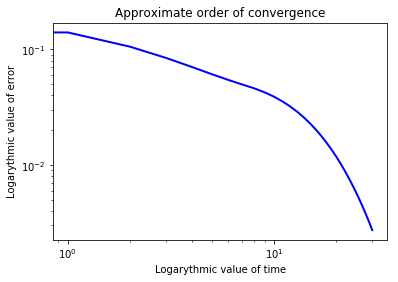

The order of convergence is  1.184989718359791


In [5]:
%matplotlib inline
#Calculating average error of absolute difference between numerical and analytical solutions 
average_error = []
for t in range(len(time)):
    average_error.append(np.mean(abs(u_xyt2[t,:,:]-u_xyt1[t,:,:])))
    
fig = plt.figure()
line, = plt.plot(time[0:(len(time))],average_error, color='blue', lw=2)
plt.xscale('log')
plt.yscale('log')
plt.title("Approximate order of convergence")
plt.xlabel("Logarythmic value of time")
plt.ylabel("Logarythmic value of error")
plt.show()

#logarythmic regression
log_time = np.log(time[1:])
log_error = np.log(average_error[1:])
coef_a, coef_b = np.polyfit(log_time,log_error, deg = 1 )

#Order of convergence via tangent of error points
order_of_convergence = -coef_a
print("The order of convergence is ",str(order_of_convergence) )

We took different number of $x$ and $y$ nodes and we observed that the value of convergence is of course changing for different grid parametrization but overall, the more nodes we have, the higher value of convergence we get. Number of time steps also affects this order, because time is responsible for number of error points. In our situation the order of convergence is $\alpha \approx 1.185$.


Another aspect of the method that we analysed was the stability. We decided to take the experimental approach and what we found was that our method in the examples that we chose was always stable. No matter how many nodes or how many time steps we took, the method seemed to be stable and had no problems with being compared to the analytical solution. Our observation was justified because in FEM method we choose the shape functions for the weak formulation using Galerkin method which results in providing the stable solution.

Following Python code shows the $3D$ plot of difference over time between analytical and numerical solutions.

In [6]:
#3d error plot  
%matplotlib qt
fig = plt.figure(figsize=(15,10), dpi = 80)
ax = fig.add_subplot(1,1,1, projection='3d')
error = abs(u_xyt2[0,:,:]-u_xyt1[0,:,:])
plt_error = ax.plot_surface(x2d, y2d, error, vmax = 0.5, vmin = 0, cmap= cm.jet, antialiased=True)
ax.set_zlim3d(0, 3)
ax.set_aspect('auto')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Average error')
ax.set_title('Average error of numerical solution, t = {}'.format(time[t]+1))
ax.set_xlim3d(leftX, rightX)
ax.set_ylim3d(leftY, rightY)
fig.colorbar(plt_error, shrink=0.5, aspect=10)
plt.show(block=False)
plt.pause(0.3)
for t in range(1,len(time)-1):
    ax.clear()
    error = abs(u_xyt2[t,:,:]-u_xyt1[t,:,:])
    plt_error = ax.plot_surface(x2d, y2d, error, vmax = 0.5, vmin = 0, cmap= cm.jet, antialiased=True)
    ax.set_zlim3d(0, 3)
    ax.set_aspect('auto')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Average error')
    ax.set_title('Average error of numerical solution, t = {}'.format(time[t]+1))
    plt.show(block=False)
    plt.pause(0.3)

<h2> Description of our application </h2>

We've decided to create the application, where user can set his own conditions and parameters and check how the particular problem is being solved numerically. It's possible to observe the change of the temperature on the plate over time and see on the phase plot how the heat flux behaves. We have also set some restrictions for the entry fields in the GUI that are described below:
- Number of nodes on the X axis should be an integer (optimally between 5 and 30),
- Number of nodes on the Y axis should be an integer (optimally between 5 and 30),
- Length and width of the plane -- these values should not affect the final result, they just appear on the animation,
- Time duration should be a value that allows the numerical solution to reach the desired state,
- Timestep indicates the difference between the next steps of the solution (the lesser value, the more precise is the animation),
- $\kappa_x$ and $\kappa_y$ -- these are the values that indicate the thermal conductivity in the particular directions, their values should be greater than $0$,
- Coefficients $\rho$ -- density of the plate and $c$ -- proper heat of the plate are the coefficients of the heat equation and affect the solution, sholud also be greater than 0,
- Initial condition describes the initial temperature of the nodes, it can be a function depending on $x$ and $y$ variables or can be constant,
- Source value -- a constant, positive value represents the heat inflow (outflow, in case it's negative) for the whole plate,
- Dirichlet BC -- Boundary conditions that indicate the constant temperatures over the edges, the function describing the temperature can also depend on the $x$ and $y$ (it's important to remember that left and right edge depend only on $y$, front and back edges depend only on $x$),
- Neumann BC -- Boundary conditions that indicate the heat flux on the boundaries, it may be constant, but can also depend on time ($t$) with functions included in the next point,
- The functions that are implemented into our application and are allowed to be used are: constant values, any power function, exponential function, sine and cosine functions and $\pi$ constant, it's possible to combine these functions as the user would like to,
- After all the entry fields have been filled with desired values, the user can click on the 'Calculate' button that will run the simulation and the grid plot of the nodes of the plate will appear below. It might take some time depending on the values inserted, so please be patient,
- When the calculations are finished, the user can click the 'Plot' button. After that, the new window will appear where there would be shown the animation of the numerical solution of the heat equation and the phase plot of the heat flux. Please remember not to initialize another plot before the previous one had finished,
- To exit from the application please click 'Exit' button.
- In case some errors appear please install PyQt5 module for the proper working of the animation.


Following code is responsible for the whole application.

In [7]:
%matplotlib qt
import warnings
warnings.filterwarnings("ignore")

#function that allows to cretae grid plot
def createGrid(xLength, yHeight, xNumOfNodes, yNumOfNodes):
    nodesX = np.linspace(0,xLength,xNumOfNodes)
    nodesY = np.linspace(0,yHeight,yNumOfNodes)
    x2d, y2d = np.meshgrid(nodesX,nodesY)
    return nodesX, nodesY, x2d, y2d

#creates time interval for the animation
def createTimeInterval(timeMax, dt):
    Time = np.arange(dt,timeMax+dt,dt)
    return Time

#creates the initial temperature on the whole plate besides edges
def initialTemperature(nodesX, nodesY, tempFunc):
    nX = len(nodesX)
    nY = len(nodesY)
    initialTemp = np.zeros(shape = (nY, nX))
    for i, x in enumerate(nodesX):
        for j, y in enumerate(nodesY):
            initialTemp[j,i] = eval(tempFunc)
    return initialTemp[:,:].reshape((nY*nX,1))

#defines Dirichlet BCs on the edges of the plate
def boundaryConditionsT(initialT, wallChoice, tempFunc, xNumOfNodes, yNumOfNodes,nodesX,nodesY):
    T = []
    T.append(initialT[:])
    if wallChoice == []:
        return T, [], []
    
    indexes = []
    temperatures = []
    for choice in wallChoice:
        if choice is 'left':
            leftWallIndexes = [0 + i*xNumOfNodes for i in range(0,yNumOfNodes)]
            for i,index in enumerate(leftWallIndexes):
                y = nodesY[i]
                temp = eval(tempFunc[wallChoice.index(choice)])
                indexes.append(index) 
                temperatures.append(temp)
                T[0][index] = temp
        elif choice is 'right':
            rightWallIndexes = [xNumOfNodes-1 + i*xNumOfNodes for i in range(0,yNumOfNodes)]
            for i,index in enumerate(rightWallIndexes):
                y = nodesY[i]
                temp = eval(tempFunc[wallChoice.index(choice)])
                indexes.append(index) 
                temperatures.append(temp)
                T[0][index] = temp
        elif choice is 'front':
            frontWallIndexes = [xNumOfNodes*(xNumOfNodes-1) + i for i in range(0,xNumOfNodes)]
            for i,index in enumerate(frontWallIndexes):
                x = nodesX[i]
                temp = eval(tempFunc[wallChoice.index(choice)])
                indexes.append(index) 
                temperatures.append(temp)
                T[0][index] = temp
        elif choice is 'back':
            backWallIndexes = [i for i in range(0,xNumOfNodes)]
            for i,index in enumerate(backWallIndexes):
                x = nodesX[i]
                temp = eval(tempFunc[wallChoice.index(choice)])
                indexes.append(index) 
                temperatures.append(temp)
                T[0][index] = temp            
    for i in range(len(indexes)):
        for j in range(len(indexes)):
            if indexes[i] == indexes[j]: 
                temperatures[i],temperatures[j] = (temperatures[i]+temperatures[j])/2,(temperatures[i]+temperatures[j])/2
    return T,indexes,np.array(temperatures).reshape((len(temperatures),1))

#creates global nodes
def globalNodes_1(yNumOfNodes,xNumOfNodes):
    globalNodes = np.zeros((yNumOfNodes, xNumOfNodes))
    globalNode = 0
    for j in range(yNumOfNodes):
        for i in range(xNumOfNodes):
            globalNodes[j,i] = int(globalNode)
            globalNode += 1
    return globalNodes

#creates global coordinates of the nodes
def globalCoordinates_1(yNumOfNodes,xNumOfNodes,nodesX, nodesY):
    globalCoordinates = []
    for i in range(yNumOfNodes):
        rowElements = []
        for j in range(xNumOfNodes):
            rowElements.append((nodesY[i], nodesX[j]))
        globalCoordinates.append(rowElements)
    return globalCoordinates

#creates local nodes
def globalNodesOfElements_1(yNumOfNodes, xNumOfNodes, globalNodes):
    globalNodesOfElements = np.zeros(((xNumOfNodes-1)*(yNumOfNodes-1), 4))
    node = 0
    for j in range(yNumOfNodes-1):
        for i in range(xNumOfNodes-1):
            globalNodesOfElements[node] = [globalNodes[j  ,i  ],
                                           globalNodes[j+1,i  ],
                                           globalNodes[j+1,i+1],
                                           globalNodes[j  ,i+1] ]
            node += 1
    return globalNodesOfElements

#creates local coordinates of the nodes
def globalCoordsOfElements_1(yNumOfNodes,xNumOfNodes,globalCoordinates):
    globalCoordsOfElements = []
    for j in range(yNumOfNodes-1):
        for i in range(xNumOfNodes-1):
            globalCoordsOfElements.append([globalCoordinates[j  ][i  ],
                                           globalCoordinates[j+1][i  ],
                                           globalCoordinates[j+1][i+1],
                                           globalCoordinates[j  ][i+1] ])
    return globalCoordsOfElements    

#function drawing the grid plot
def drawGrid(ax,globalCoordsOfElements):
    for element in globalCoordsOfElements:
        for point in element:
            ax.scatter(point[0],point[1],color='blue')
    ax.set_title('Placement of nodes on the grid')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show(block=False)

#defines Neumann BCs on the edges of the plate   
def NeumanBC(globalNodeElement, globalNodes, visited, i, F, t, N, weights, detJacobian, WallChoice, tempFunc):
    if globalNodeElement not in visited:
        for wall in WallChoice:
            if wall == "back":          
                temp = eval(tempFunc[WallChoice.index(wall)])
                if globalNodeElement in globalNodes[0,:]:
                    F  = F + np.array(N[:,i]*temp*weights[i]*detJacobian).reshape(4,1)        
                    visited.append(globalNodeElement)
            if wall == "right":
                temp = eval(tempFunc[WallChoice.index(wall)])
                if globalNodeElement in globalNodes[:,-1]:
                    F  = F + np.array(N[:,i]*temp*weights[i]*detJacobian).reshape(4,1)        
                    visited.append(globalNodeElement)
            if wall == "left":
                temp = eval(tempFunc[WallChoice.index(wall)])
                if globalNodeElement in globalNodes[:,0]:
                    F  = F + np.array(N[:,i]*temp*weights[i]*detJacobian).reshape(4,1)        
                    visited.append(globalNodeElement)
            if wall == "front":
                temp = eval(tempFunc[WallChoice.index(wall)])
                if globalNodeElement in globalNodes[-1,:]:
                    F  = F + np.array(N[:,i]*temp*weights[i]*detJacobian).reshape(4,1)        
                    visited.append(globalNodeElement)
    return F,visited

#Main function that numerically calculates the temperature at each timestep on the whole plate
def calculateTheProcess(xNumOfNodes,yNumOfNodes,time,globalNodesOfElements,numOfNodesPerEl,globalCoordsOfElements,dNLocal,N,KAPPA, weights, source, globalNodes, dt, indexes, temperatures,NBC,TNBC):
    
    KLGlobal = np.zeros((xNumOfNodes*yNumOfNodes,xNumOfNodes*yNumOfNodes)) 
    KRGlobal = np.zeros((xNumOfNodes*yNumOfNodes,xNumOfNodes*yNumOfNodes))
    FGlobal  = np.zeros((xNumOfNodes*yNumOfNodes,                      1))  
    QGlobal =  np.zeros((                      2,xNumOfNodes*yNumOfNodes))
    QGlobalTime = []
    
    for it,t in enumerate(time):
        visited = []
        for iel,element in enumerate(globalNodesOfElements):
            MM = np.zeros(shape = (numOfNodesPerEl,numOfNodesPerEl))
            KM = np.zeros(shape = (numOfNodesPerEl,numOfNodesPerEl))    
            F  = np.zeros(shape = (numOfNodesPerEl,              1))
            Q  = np.zeros(shape = (              2,numOfNodesPerEl))
           
            for i in range(numOfNodesPerEl):
                x1 = globalCoordsOfElements[iel][0][0]
                y1 = globalCoordsOfElements[iel][0][1]
                x2 = globalCoordsOfElements[iel][1][0]
                y2 = globalCoordsOfElements[iel][1][1]
                x3 = globalCoordsOfElements[iel][2][0]
                y3 = globalCoordsOfElements[iel][2][1]
                x4 = globalCoordsOfElements[iel][3][0]
                y4 = globalCoordsOfElements[iel][3][1]
                Jacobian = dNLocal[i].dot(np.array([[x1,y1],
                                                    [x2,y2],
                                                    [x3,y3],
                                                    [x4,y4] ]))
                invJacobian = inv(Jacobian)
                detJacobian = det(Jacobian)
                dNGlobal    = invJacobian.dot(dNLocal[i])
                              
                MM = MM + np.transpose(N[i,:]).dot(N[i,:])*weights[i]*detJacobian
                KM = KM + (np.transpose(dNGlobal).dot(KAPPA)).dot(dNGlobal)*weights[i]*detJacobian
                F  = F  + np.array(N[:,i]*source*weights[i]*detJacobian).reshape(4,1)
                F, visited = NeumanBC(globalNodesOfElements[iel][i], globalNodes, visited, i, F, t, N, weights, detJacobian, NBC, TNBC)

                element = [int(node) for node in element]
                Q[:,i] = Q[:,i] + np.transpose(-(KAPPA.dot(dNGlobal)).dot(T[it-1][element]))*detJacobian
                

                KL = MM/dt + KM
                KR = MM/dt

                
            for k,node in enumerate(element):
                FGlobal[int(node),0] += F[k]
                QGlobal[:,int(node)] += Q[:,k]
                for j,otherNode in enumerate(element):
                    KLGlobal[int(node),int(otherNode)] += KL[k][j]
                    KRGlobal[int(node),int(otherNode)] += KR[k][j]


        b = KRGlobal.dot(T[it-1].reshape((yNumOfNodes*xNumOfNodes,1))) + FGlobal

        #Dirichlet
        if indexes != []:
            KLGlobal[indexes,:] = 0
            KLGlobal[indexes,indexes] = 1
            b[indexes,0] = temperatures[:,0]
        T.append(inv(KLGlobal).dot(b))
        QGlobalTime.append(QGlobal.copy())
    for i in range(len(T)):
        T[i] = T[i].reshape(yNumOfNodes,xNumOfNodes)
    return T, QGlobalTime

#Function that allows to draw the animaton of temaperature change over the time and the phase plot of the heat flux
def timePlot(pause):
    global T, Q, yNumOfNodes, xNumOfNodes, x2d, y2d, dt
    minT = min(T[0].reshape(yNumOfNodes*xNumOfNodes))
    maxT = max(T[0].reshape(yNumOfNodes*xNumOfNodes))
    if minT == maxT:
        vmin = -20
        vmax = 70
    else:
        vmin = minT
        vmax = maxT

    fig = plt.figure(1, figsize=(20,8), dpi = 80)

    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.set_xlim3d(0, xLength)
    ax.set_ylim3d(0, yHeight)
    ax.set_zlim3d(vmin, vmax)
    ax.set_title('Temperature plot, t = {}'.format(0))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('T')
    surf = ax.plot_surface(x2d, y2d, T[0], vmin = -20, vmax = 70, cmap= cm.jet, antialiased=True)    
    fig.colorbar(surf, shrink=0.5, aspect=10)

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_title('Heat flux plot')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    
    for i in range(len(T)):
        if i > 0:
            ax2.clear()
            ax2.quiver(x2d,y2d,-Q[i-1][1],-Q[i-1][0],angles='xy', units='xy')
            ax2.set_aspect('equal')
            ax2.set_title('Heat flux plot')
            ax2.set_xlabel('X')
            ax2.set_ylabel('Y')
        ax.clear()  
        surf = ax.plot_surface(x2d, y2d, T[i], vmin = -20, vmax = 70, cmap= cm.jet, antialiased=False)     
        ax.set_title('Temperature plot, t = {}'.format(i*dt))
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('T')
        ax.set_zlim3d(vmin, vmax)
        ax.set_aspect('auto')        
        plt.show(block=False)
        plt.pause(pause)

#Function drawing the heat flux phase plot   
def HeatPlot():
    global T, Q, yNumOfNodes, xNumOfNodes, x2d, y2d, Time
    timePlot(0.001)


In [8]:
root = tk.Tk()

root.geometry("815x815")
root.title('Finite element method solution of 2D heat equation on a plane')

n_of_nodes_x = tk.Label(root, text='Number of nodes on aX')
n_of_nodes_x.grid(row = 0, column=0)

n_of_nodes_y = tk.Label(root, text='Number of nodes on aY')
n_of_nodes_y.grid(row = 0,column=1)

n_of_nodes_x_entry = tk.Entry(root)
n_of_nodes_x_entry.insert(0,'10')
n_of_nodes_x_entry.grid(row=1,column=0)
n_of_nodes_x_entry.focus_set()

n_of_nodes_y_entry = tk.Entry(root,)
n_of_nodes_y_entry.insert(0,'10')
n_of_nodes_y_entry .grid(row=1,column=1)
n_of_nodes_y_entry .focus_set()

x_length = tk.Label(root, text='Length of the plane')
x_length.grid(row = 2, column=0)

y_length = tk.Label(root, text='Width of the plane')
y_length.grid(row = 2,column=1)

x_length_entry = tk.Entry(root,)
x_length_entry.insert(0,'10')
x_length_entry.grid(row=3,column=0)
x_length_entry.focus_set()

y_length_entry = tk.Entry(root,)
y_length_entry.insert(0,'10')
y_length_entry .grid(row=3,column=1)
y_length_entry .focus_set()


T_max = tk.Label(root, text='Time duration')
T_max.grid(row = 4, column=0)

timestep = tk.Label(root, text='Timestep')
timestep.grid(row = 4,column=1)


T_max_entry = tk.Entry(root,)
T_max_entry.insert(0,'1000')
T_max_entry.grid(row=5,column=0)
T_max_entry.focus_set()

timestep_entry = tk.Entry(root,)
timestep_entry.insert(0,'5')
timestep_entry .grid(row=5,column=1)
timestep_entry .focus_set()

IC = tk.Label(root, text='Initnial condition')
IC.grid(row = 10, column=0)

IC_entry = tk.Entry(root,)
IC_entry.insert(0,'x+y')
IC_entry.grid(row=11,column=0)
IC_entry.focus_set()


BCD = tk.Label(root, text='Dirichlet BC')
BCD.grid(row = 0, column=4)
BCN = tk.Label(root, text='Neumann BC')
BCN.grid(row = 0, column=6)

left_edge = tk.Label(root, text='Left edge')
left_edge.grid(row = 1, column=2)

right_edge = tk.Label(root, text='Right edge')
right_edge.grid(row = 2, column=2)

front_edge = tk.Label(root, text='Front edge')
front_edge.grid(row = 3, column=2)

back_edge = tk.Label(root, text='Back edge')
back_edge.grid(row = 4, column=2)


#function that checks if one of the checkboxes for each edge is checked and forbids the other to be checked
#(applies to all is_checked functions)
def isChecked_1():
    if left_edge_check_D_var.get() == 1:
        left_edge_entry_D.config(state='normal')
        left_edge_entry_D.focus_set()
        left_edge_entry_N.config(state='disabled')
        left_edge_entry_N.focus_set()
        left_edge_check_N_var.set(0)  
    elif left_edge_check_D_var.get() == 0:
        left_edge_entry_D.config(state='disabled')
        left_edge_entry_D.focus_set()


def isChecked_2():
    if left_edge_check_N_var.get() == 1:
        left_edge_entry_N.config(state='normal')
        left_edge_entry_D.config(state='disabled')
        left_edge_entry_D.focus_set()
        left_edge_entry_N.focus_set()
        left_edge_check_D_var.set(0)     
    elif left_edge_check_N_var.get() == 0:
        left_edge_entry_N.config(state='disabled')
        left_edge_entry_N.focus_set()

        

left_edge_check_D_var = tk.IntVar()
left_edge_check_D = tk.Checkbutton(root,variable=left_edge_check_D_var, onvalue=1, offvalue=0, command = isChecked_1)
left_edge_check_D.grid(row=1, column = 3, sticky = "w")


left_edge_entry_D = tk.Entry(root,)
left_edge_entry_D.insert(0,'0')
left_edge_entry_D.grid(row=1,column=4)
left_edge_entry_D.config(state='disabled')
left_edge_entry_D.focus_set()

left_edge_check_N_var = tk.IntVar()
left_edge_check_N = tk.Checkbutton(root, text='',variable=left_edge_check_N_var, onvalue=1, offvalue=0,command = isChecked_2)
left_edge_check_N.grid(row=1, column = 5, sticky = "e")
left_edge_check_N.select()

left_edge_entry_N = tk.Entry(root,)
left_edge_entry_N.insert(0,'5*sin(t/20)')
left_edge_entry_N.grid(row=1,column=6)
left_edge_entry_N.config(state='normal')
left_edge_entry_N.focus_set()


def isChecked_3():
    if right_edge_check_D_var.get() == 1:
        right_edge_entry_D.config(state='normal')
        right_edge_entry_D.focus_set()
        right_edge_entry_N.config(state='disabled')
        right_edge_entry_N.focus_set()
        right_edge_check_N_var.set(0)  
    elif right_edge_check_D_var.get() == 0:
        right_edge_entry_D.config(state='disabled')
        right_edge_entry_D.focus_set()


def isChecked_4():
    if right_edge_check_N_var.get() == 1:
        right_edge_entry_N.config(state='normal')
        right_edge_entry_D.config(state='disabled')
        right_edge_entry_D.focus_set()
        right_edge_entry_N.focus_set()
        right_edge_check_D_var.set(0)     
    elif right_edge_check_N_var.get() == 0:
        right_edge_entry_N.config(state='disabled')
        right_edge_entry_N.focus_set()


right_edge_check_D_var = tk.IntVar()
right_edge_check_D = tk.Checkbutton(root,variable=right_edge_check_D_var, onvalue=1, offvalue=0, command = isChecked_3)
right_edge_check_D.grid(row=2, column = 3, sticky = "w")
right_edge_check_D.select()

right_edge_entry_D = tk.Entry(root,)
right_edge_entry_D.insert(0,'y+1')
right_edge_entry_D.grid(row=2,column=4)
right_edge_entry_D.config(state='normal')
right_edge_entry_D.focus_set()

right_edge_check_N_var = tk.IntVar()
right_edge_check_N = tk.Checkbutton(root,variable=right_edge_check_N_var, onvalue=1, offvalue=0, command = isChecked_4)
right_edge_check_N.grid(row=2, column = 5, sticky = "e")

right_edge_entry_N = tk.Entry(root,)
right_edge_entry_N.insert(0,'0')
right_edge_entry_N.grid(row=2,column=6)
right_edge_entry_N.config(state='disabled')
right_edge_entry_N.focus_set()

def isChecked_5():
    if front_edge_check_D_var.get() == 1:
        front_edge_entry_D.config(state='normal')
        front_edge_entry_D.focus_set()
        front_edge_entry_N.config(state='disabled')
        front_edge_entry_N.focus_set()
        front_edge_check_N_var.set(0)  
    elif front_edge_check_D_var.get() == 0:
        front_edge_entry_D.config(state='disabled')
        front_edge_entry_D.focus_set()


def isChecked_6():
    if front_edge_check_N_var.get() == 1:
        front_edge_entry_N.config(state='normal')
        front_edge_entry_D.config(state='disabled')
        front_edge_entry_D.focus_set()
        front_edge_entry_N.focus_set()
        front_edge_check_D_var.set(0)     
    elif front_edge_check_N_var.get() == 0:
        front_edge_entry_N.config(state='disabled')
        front_edge_entry_N.focus_set()

front_edge_check_D_var = tk.IntVar()
front_edge_check_D = tk.Checkbutton(root,variable=front_edge_check_D_var, onvalue=1, offvalue=0, command = isChecked_5)
front_edge_check_D.grid(row=3, column = 3, sticky = "w")

front_edge_entry_D = tk.Entry(root,)
front_edge_entry_D.insert(0,'0')
front_edge_entry_D.grid(row=3,column=4)
front_edge_entry_D.config(state='disabled')
front_edge_entry_D.focus_set()

front_edge_check_N_var = tk.IntVar()
front_edge_check_N = tk.Checkbutton(root,variable=front_edge_check_N_var, onvalue=1, offvalue=0, command = isChecked_6)
front_edge_check_N.grid(row=3, column = 5, sticky = "e")

front_edge_entry_N = tk.Entry(root,)
front_edge_entry_N.insert(0,'0')
front_edge_entry_N.grid(row=3,column=6)
front_edge_entry_N.config(state='disabled')
front_edge_entry_N.focus_set()


def isChecked_7():
    if back_edge_check_D_var.get() == 1:
        back_edge_entry_D.config(state='normal')
        back_edge_entry_D.focus_set()
        back_edge_entry_N.config(state='disabled')
        back_edge_entry_N.focus_set()
        back_edge_check_N_var.set(0)  
    elif back_edge_check_D_var.get() == 0:
        back_edge_entry_D.config(state='disabled')
        back_edge_entry_D.focus_set()


def isChecked_8():
    if back_edge_check_N_var.get() == 1:
        back_edge_entry_N.config(state='normal')
        back_edge_entry_D.config(state='disabled')
        back_edge_entry_D.focus_set()
        back_edge_entry_N.focus_set()
        back_edge_check_D_var.set(0)     
    elif back_edge_check_N_var.get() == 0:
        back_edge_entry_N.config(state='disabled')
        back_edge_entry_N.focus_set()

back_edge_check_D_var = tk.IntVar()
back_edge_check_D = tk.Checkbutton(root,variable=back_edge_check_D_var, onvalue=1, offvalue=0, command = isChecked_7)
back_edge_check_D.grid(row=4, column = 3, sticky = "w")

back_edge_entry_D = tk.Entry(root,)
back_edge_entry_D.insert(0,'0')
back_edge_entry_D.grid(row=4,column=4)
back_edge_entry_D.config(state='disabled')
back_edge_entry_D.focus_set()

back_edge_check_N_var = tk.IntVar()
back_edge_check_N = tk.Checkbutton(root,variable=back_edge_check_N_var, onvalue=1, offvalue=0, command = isChecked_8)
back_edge_check_N.grid(row=4, column = 5, sticky = "e")

back_edge_entry_N = tk.Entry(root,)
back_edge_entry_N.insert(0,'0')
back_edge_entry_N.grid(row=4,column=6)
back_edge_entry_N.config(state='disabled')
back_edge_entry_N.focus_set()

kappa_x = tk.Label(root, text='κᵪ')
kappa_x.grid(row = 6, column=0)

kappa_y = tk.Label(root, text='κᵧ')
kappa_y.grid(row = 6, column=1)

kappa_x_entry = tk.Entry(root,)
kappa_x_entry.insert(0,'2')
kappa_x_entry.grid(row=7,column=0)
kappa_x_entry.focus_set()

kappa_y_entry = tk.Entry(root,)
kappa_y_entry.insert(0,'2')
kappa_y_entry .grid(row=7,column=1)
kappa_y_entry .focus_set()

coef_rho = tk.Label(root, text='Coefficient ρ')
coef_rho.grid(row = 8, column=0)

coef_c = tk.Label(root, text='Coefficient c')
coef_c.grid(row = 8, column=1)

coef_rho_entry = tk.Entry(root,)
coef_rho_entry.insert(0,'1')
coef_rho_entry.grid(row=9,column=0)
coef_rho_entry.focus_set()

coef_c_entry = tk.Entry(root,)
coef_c_entry.insert(0,'1')
coef_c_entry .grid(row=9,column=1)
coef_c_entry .focus_set()



source_s = tk.Label(root, text='Source value')
source_s.grid(row = 10, column=1)

source_s_entry = tk.Entry(root,)
source_s_entry.insert(0,'0')
source_s_entry.grid(row=11,column=1)
source_s_entry.focus_set()



from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


space3 = tk.Label(root, text='                                      ')
space3.grid(row = 4, column=7)

space4 = tk.Label(root, text='               ')
space4.grid(row = 14, column=6)

#Function that reads all the values of the app entries, checks if their type is valid and evaluates formulas for the calculations
def takeAllValues():

    global T, Q, xNumOfNodes, yNumOfNodes,xLength,yHeight,nodesX, nodesY, x2d, y2d,timeMax,dt,time
    
    xLength = x_length_entry.get()
    try:
        eval(xLength)
    except:
        xLength = ""
    if xLength == "" or (type(eval(xLength)) != int and type(eval(xLength)) != float) or eval(xLength) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="Length of plate must be of type integer or float and greater than 0")
        return
    else:
        xLength = eval(x_length_entry.get())
        
    yHeight = y_length_entry.get()
    try:
        eval(yHeight)
    except:
        yHeight = ""
    if yHeight == "" or (type(eval(yHeight)) != int and type(eval(yHeight)) != float) or eval(yHeight) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="Width of plate must be of type integer or float and greater than 0")
        return
    else:
        yHeight = eval(y_length_entry.get())

      
    xNumOfNodes = n_of_nodes_x_entry.get()
    try:
        eval(xNumOfNodes)
    except:
        xNumOfNodes = ""
    if xNumOfNodes == "" or type(eval(xNumOfNodes)) != int or eval(xNumOfNodes) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="Number of X nodes must be of type integer and greater than 0")
        return 
    else:
        xNumOfNodes = eval(n_of_nodes_x_entry.get())
        
    yNumOfNodes = n_of_nodes_y_entry.get()
    try:
        eval(yNumOfNodes)
    except:
        yNumOfNodes = ""
    if yNumOfNodes == "" or type(eval(yNumOfNodes)) != int or eval(yNumOfNodes) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="Number of Y nodes must be of type integer and greater than 0")
        return
    else:
        yNumOfNodes = eval(n_of_nodes_y_entry.get())
    nodesX, nodesY, x2d, y2d = createGrid(xLength, yHeight, xNumOfNodes, yNumOfNodes)

    
    timeMax = T_max_entry.get()
    try:
        eval(timeMax)
    except:
        timeMax = ""
    if timeMax == "" or (type(eval(timeMax)) != int and type(eval(timeMax)) != float) or eval(timeMax) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="Time must be of type integer or float and greater than 0")
        return
    else:
        timeMax = eval(T_max_entry.get())
    
    dt = timestep_entry.get()
    try:
        eval(dt)
    except:
        dt = ""
    if dt == "" or (type(eval(dt)) != int and type(eval(dt)) != float) or eval(dt) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="Timesteps must be of type integer or float and greater than 0")
        return
    else:
        dt = eval(timestep_entry.get())
    
    Time = createTimeInterval(timeMax, dt)

    initial_func = IC_entry.get()
    initialT = initialTemperature(nodesX, nodesY, initial_func)
    
    rho = coef_rho_entry.get()
    try:
        eval(rho)
    except:
        rho = ""
    if rho == "" or (type(eval(rho)) != int and type(eval(rho)) != float) or eval(rho) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="ρ must be of type integer or float and greater than 0")
        return
    else:
        rho = eval(coef_rho_entry.get())

    c = coef_c_entry.get()
    try:
        eval(c)
    except:
        c = ""
    if c == "" or (type(eval(c)) != int and type(eval(c)) != float) or eval(c) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="C must be of type integer or float and greater than 0")
        return
    else:
        c = eval(coef_c_entry.get())

    kappaX = kappa_x_entry.get()
    try:
        eval(kappaX)
    except:
        kappaX = ""
    if kappaX == "" or (type(eval(kappaX)) != int and type(eval(kappaX)) != float) or eval(kappaX) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="κᵪ must be of type integer or float and greater than 0")
        return
    else:
        kappaX = eval(kappa_x_entry.get())

    kappaY = kappa_y_entry.get()
    try:
        eval(kappaY)
    except:
        kappaY = ""
    if kappaY == "" or (type(eval(kappaY)) != int and type(eval(kappaY)) != float) or eval(kappaY) <= 0:
        tk.messagebox.showwarning(title="Wrong type of data input", message="κᵧ must be of type integer or float and greater than 0")
        return
    else:
        kappaY = eval(kappa_y_entry.get())

    KAPPA = np.array([[kappaX,0],[0,kappaY]])/(rho*c)
    source = source_s_entry.get()
    try:
        eval(source)
    except:
        source = ""
    if source== "" or (type(eval(source)) != int and type(eval(source)) != float):
        tk.messagebox.showwarning(title="Wrong type of data input", message="Source must be of type integer or float")
        return
    else:
        source = eval(source_s_entry.get())
        
    TDBCs = []
    DBCs = []
    if len(front_edge_entry_D.get())!= 0 and  front_edge_check_D_var.get() == 1:
        TDBCs.append(front_edge_entry_D.get())
        DBCs.append('front')
    if len(right_edge_entry_D.get())!= 0 and  right_edge_check_D_var.get() == 1:
        TDBCs.append(right_edge_entry_D.get())
        DBCs.append('right')
    if len(left_edge_entry_D.get())!= 0 and  left_edge_check_D_var.get() == 1:
        TDBCs.append(left_edge_entry_D.get())
        DBCs.append('left')
    if len(back_edge_entry_D.get())!= 0 and  back_edge_check_D_var.get() == 1:
        TDBCs.append(back_edge_entry_D.get())
        DBCs.append('back')

    
    TNBCs = []
    NBCs = []
    if len(front_edge_entry_N.get())!= 0 and  front_edge_check_N_var.get() == 1:
        TNBCs.append(front_edge_entry_N.get())
        NBCs.append('front')
    if len(right_edge_entry_N.get())!= 0 and  right_edge_check_N_var.get() == 1:
        TNBCs.append(right_edge_entry_N.get())
        NBCs.append('right')
    if len(left_edge_entry_N.get())!= 0 and  left_edge_check_N_var.get() == 1:
        TNBCs.append(left_edge_entry_N.get())
        NBCs.append('left')
    if len(back_edge_entry_N.get())!= 0 and  back_edge_check_N_var.get() == 1:
        TNBCs.append(back_edge_entry_N.get())
        NBCs.append('back')

    T, indexes, temperatures = boundaryConditionsT(initialT,DBCs,TDBCs, xNumOfNodes, yNumOfNodes,nodesX,nodesY)
    
    numOfNodesPerEl = 4
    globalNodes = globalNodes_1(yNumOfNodes,xNumOfNodes)
    localNodes = np.array([[-1,-1],[-1, 1],[ 1, 1],[ 1,-1]])
    globalCoordinates = globalCoordinates_1(yNumOfNodes,xNumOfNodes, nodesX, nodesY)
    globalNodesOfElements = globalNodesOfElements_1(yNumOfNodes,xNumOfNodes, globalNodes)
    globalCoordsOfElements = globalCoordsOfElements_1(yNumOfNodes,xNumOfNodes,globalCoordinates)

    gridFigure = Figure(figsize=(6, 4), dpi=100)
    gridCanvas = FigureCanvasTkAgg(gridFigure, root)
    gridCanvas.get_tk_widget().grid(row=17, column=0, columnspan=7)
    grid = gridFigure.add_subplot(1,1,1)
    drawGrid(grid,globalCoordsOfElements)    
   
    weights = np.array([1,1,1,1])
    N1 = np.array(1/4*(1-localNodes[:,0])*(1-localNodes[:,1]))
    N2 = np.array(1/4*(1-localNodes[:,0])*(1+localNodes[:,1]))
    N3 = np.array(1/4*(1+localNodes[:,0])*(1+localNodes[:,1]))
    N4 = np.array(1/4*(1+localNodes[:,0])*(1-localNodes[:,1]))
    N  = np.array([N1,N2,N3,N4])
    dN = np.empty(shape=(2,4))
    dNLocal = []

    for i in range(numOfNodesPerEl):
        dN[0,0] = 1/4*(-1+localNodes[i,1])
        dN[1,0] = 1/4*(-1+localNodes[i,0])
        dN[0,1] = 1/4*(-1-localNodes[i,1])
        dN[1,1] = 1/4*( 1-localNodes[i,0])
        dN[0,2] = 1/4*( 1+localNodes[i,1])
        dN[1,2] = 1/4*( 1+localNodes[i,0])
        dN[0,3] = 1/4*( 1-localNodes[i,1])
        dN[1,3] = 1/4*(-1-localNodes[i,0]) 
        dNLocal.append(np.array(dN))

    Q = []
    T, Q = calculateTheProcess(xNumOfNodes,yNumOfNodes,Time,globalNodesOfElements,numOfNodesPerEl,globalCoordsOfElements,dNLocal,N,KAPPA,weights, source, globalNodes, dt, indexes, temperatures,NBCs,TNBCs)
    return Time



calculate_button = tk.Button(root, text="Calculate",height = 2, width = 10, command = takeAllValues)
calculate_button.grid(row=6, column=4, rowspan=2)

start_button = tk.Button(root, text="Plot",height = 2, width = 10, command = HeatPlot)
start_button.grid(row=6, column=6, rowspan=2)

Exit_button = tk.Button(root,text='Exit',height = 2, width = 10, command=root.destroy)
Exit_button.grid(row=10,column=6, rowspan=2)

root.mainloop()

<h2> Conclusions </h2>

The method of finite elements for the heat equation allows to quickly evaluate the changing temperature of the plate over the patricular timespan. In comparison to the analytical solution this method seems to be more efficient. For our problem the results are very close to the explicit solution of the 2-dimensional problem. While the implementation of the method might not be an easy task, it works perfectly for solving second order partial differential equations. Advantages of finite elements are clear: the method is always stable due to the discretization of the weak formulation of the problem, for heat equation we also showed that it converges very quickly, so the implementation of this method in our project is justified.

Heat equation is also a very interesting issue in the physical aspect and its applications in modern world. By solving it numerically we can show how the different objects of different shapes are being heated and how the heat flows in them. Our application allows to explore various combinations of initial and boundary conditions on the edges of the plate, so that the user can observe how the temperature changes and behaves on the surface. By the diversity of the choice of the costants the user after prior checking can enter the coefficients for different materials or metal alloys that the plate is made of. As the only limit for calculations is the power of the user's computer, the final solution can be very precise, if the number of elements is big enough.

<h2> Literature </h2>


<hr>

<a id='one'></a>
[1] <span style="font-variant: small-caps;">Schmalholz & Kaus, </span>  Introduction to Finite Element Modelling in Geosciences From 1-D to 2-D: Diffusion equation <span style="font-style: italic" >ETH Zurich</span> (2008) <br><br>
<a id='two'></a>
[2] <span style="font-variant: small-caps;">Sarah Lechmann,</span> >Introduction to Finite Element Modeling in Geosciences <span style="font-style: italic" >ETH Zurich</span> (2008) <br><br>
<a id='three'></a>
[3] <span style="font-variant: small-caps;">Deep Ray, Ritesh Kumar, Praveen. C, Mythily Ramaswamy, J.-P. Raymond,</span> Two dimensional heat equation <span style="font-style: italic" > IFCAM Summer School on Numerics and Control of PDE Bangalore</span> (2013) <br><br>
<a id='four'></a>
[4] <span style="font-variant: small-caps;">Brenner Susanne, Scott Ridgway,</span> The Mathematical Theory of Finite Element Methods <span style="font-style: italic" >Springer Science+Business Media, New York</span> (2008) <br><br>
<a id='five'></a>
[5] <span style="font-variant: small-caps;">B. Tomas Johansson, D. Lesnic, Thomas Henry Reeve,</span>A method of fundamental solutions for two dimensional heat conduction <span style="font-style: italic"> International Journal of Computer Mathematics, Taylor, Francis</span> (2006) <br><br>
